In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

# Generating Graph

I generate a [Erdos Renyi graph](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html) randomly. This graph has 200 nodes and 3011 edges.




In [2]:
# node from 1 to 200
# G = nx.erdos_renyi_graph(20, 0.15,seed=101)
# >>> petersen = nx.petersen_graph()
# >>> tutte = nx.tutte_graph()
# >>> maze = nx.sedgewick_maze_graph()
# >>> tet = nx.tetrahedral_graph()

# >>> K_5 = nx.complete_graph(5)
# >>> K_3_5 = nx.complete_bipartite_graph(3, 5)
# >>> barbell = nx.barbell_graph(10, 10)
# >>> lollipop = nx.lollipop_graph(10, 20)

# >>> er = nx.erdos_renyi_graph(100, 0.15)
# >>> ws = nx.watts_strogatz_graph(30, 3, 0.1)
# >>> ba = nx.barabasi_albert_graph(100, 5)
# >>> red = nx.random_lobster(100, 0.9, 0.9)

In [3]:
'''
optins:
1. random_lobster: nx.random_lobster(100, 0.9, 0.9)
2. munaully: 
'''

'\noptins:\n\n1. random_lobster: nx.random_lobster(100, 0.9, 0.9)\n2. munaully: \n'

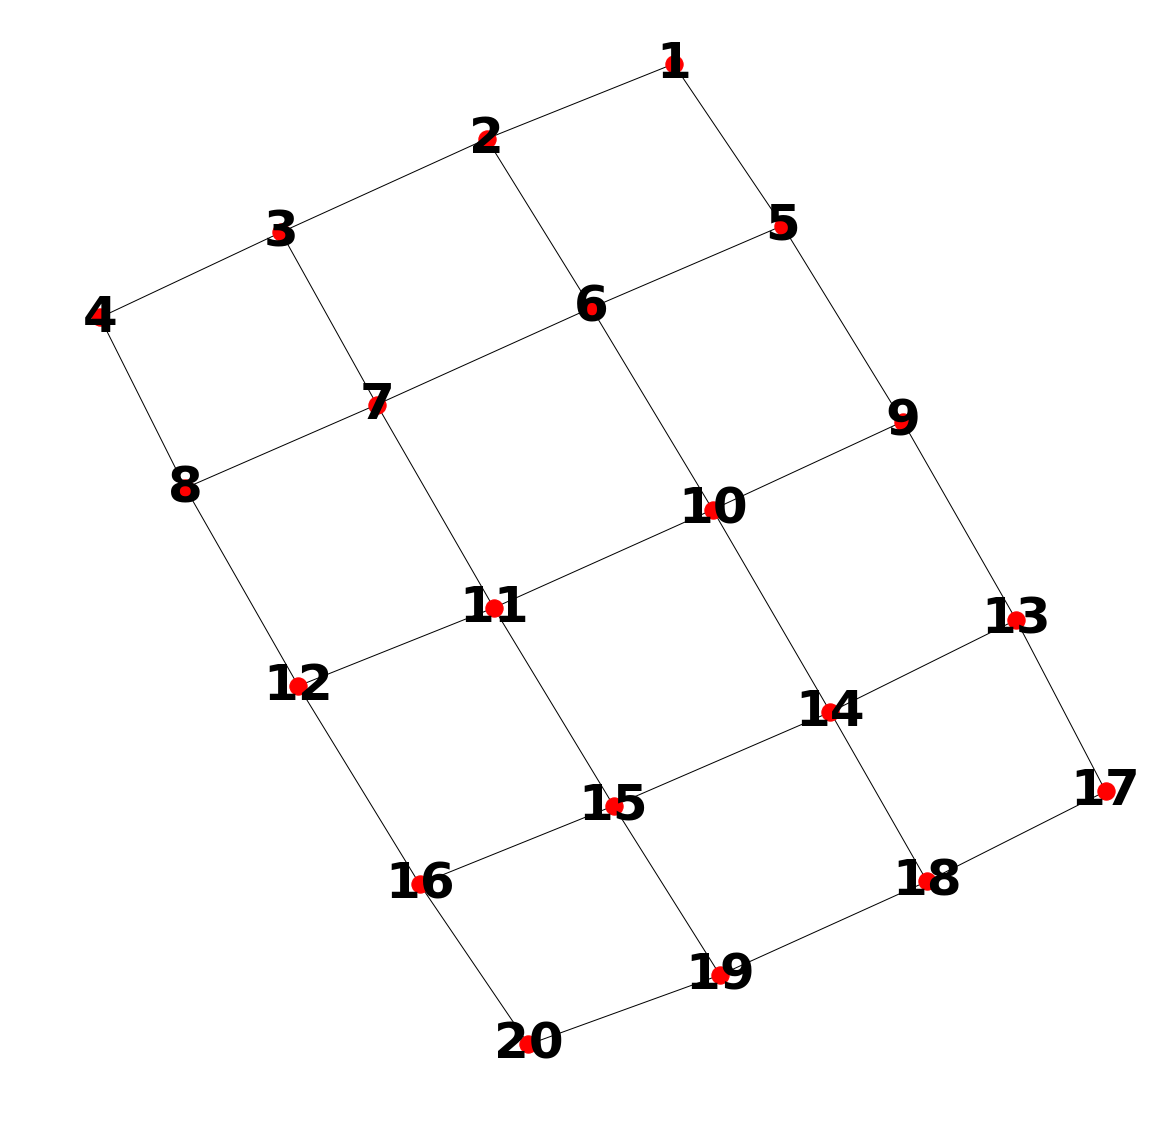

In [30]:
G = nx.convert_node_labels_to_integers(nx.grid_2d_graph(5,4),1)
fig, ax = plt.subplots(figsize= (20,20))
#plt.subplot(121)
#nx.draw_shell(G,with_labels=True, font_weight='bold')
nx.draw(G, with_labels=True, font_weight='bold', font_size = 50)
fig.savefig('./Graph.png')

# Generate random data

I use these two function to perform the random work and generate data.

In [13]:
def CreatingPlanerPositivePairs(num_pairs = 10, seqlen = 5, random_seed = None):
    
    paired_data = []
    if random_seed != None:
        np.random.seed(random_seed)
    for i in range(num_pairs):
        st_node = np.random.randint(1,21) # random sample a start node
        node = st_node
        left = []
        right = []
        for j in range(seqlen):
            node = np.random.choice(list(G.adj[node]))
            left.append(node)
        node = st_node
        for j in range(seqlen):
            node = np.random.choice(list(G.adj[node]))
            right.append(node)
        paired_dict = {'left':left,'right':right,'target':1}
        paired_data.append(paired_dict)
    return paired_data


def CreatingPlanarNegativePairs(num_pairs=10, seqlen= 50,prob= 0.1, random_seed=None, num_noise=1):
    
    unpaired_data=[]
    if random_seed != None:
        np.random.seed(random_seed)
    for i in range(num_pairs):
        st_node = np.random.randint(1,21)
        left = []
        node = st_node
        for j in range(seqlen):
            node =np.random.choice(list(G.adj[node]))
            left.append(node) 
        k=0
        while k <= num_noise:
            k=0
            node = st_node
            right = []
            for j in range(seqlen):
                if np.random.rand() < prob:
                    k+=1
                    NotConnectedNodes = [x for x in np.arange(1,21) if x not in list(G.adj[node])]
                    node =np.random.choice(NotConnectedNodes)
                else:    
                    node =np.random.choice(list(G.adj[node]))
                right.append(node)
        unpaired_dict = {'left':left,'right':right,'target':0}
        unpaired_data.append(unpaired_dict)
    return unpaired_data

In [14]:
#Positive pair
# def CreatingPositivePairs(num_pairs=10, seqlen= 50, random_seed=None):
#     '''
#     number_pairs: numbers of rows will be generated
#     seqlen: The length of sequence    
#     It will randomly chose a starting node and perfrom random walk to
#     retrieve 50 nodes. Then, the 50 nodes will be seperated to left and
#     right side and be stored in paired_dict.
#     '''
#     paired_data=[]
#     left = [] 
#     right = []
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         node = np.random.randint(1,201) 
#         nodes= [node]
#         for j in range(seqlen):
#             node =np.random.choice(list(G.adj[node]))
#             nodes.append(node)
#         splitor = np.random.randint(1,seqlen)
#         left = nodes[:splitor+1]
#         right = nodes[splitor:]
#         paired_dict = {'left':left,'right':right,'target':1}
#         paired_data.append(paired_dict)
#     return paired_data 

# def CreatingPositivePairs(num_pairs=10, seqlen= 50, random_seed=None):
#     paired_data=[]
# #     left = [] 
# #     right = []
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         node = np.random.randint(1,201)
#         left = [node]
#         for j in range(seqlen-1):
#             node =np.random.choice(list(G.adj[node]))
#             left.append(node)
#         right = [node]
#         for j in range(seqlen-1):
#             node = np.random.choice(list(G.adj[node]))
#             right.append(node)
#         paired_dict = {'left':left,'right':right,'target':1}
#         paired_data.append(paired_dict)
#     return paired_data

# def CreatingNegativePairs(num_pairs=10, seqlen= 50,prob= 0.1, random_seed=None, num_noise=3):
#     unpaired_data=[]
# #     left = [] 
# #     right = []
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         node = np.random.randint(1,201)
#         left = [node]
#         for j in range(seqlen-1):
#             node =np.random.choice(list(G.adj[node]))
#             left.append(node)
#         st_node = node    
#         k=0
#         while k <= num_noise:
#             k=0
#             try_right=[st_node]
#             for j in range(seqlen-1):
#                 if np.random.rand() < prob:
#                     k+=1
#                     NotConnectedNode = [x for x in np.arange(1,201) if x not in list(G.adj[try_right[-1]])]
#                     node =np.random.choice(NotConnectedNode)
#                 else:    
#                     node =np.random.choice(list(G.adj[try_right[-1]]))
#                 try_right.append(node)
#         right= try_right
#         unpaired_dict = {'left':left,'right':right,'target':0}
#         unpaired_data.append(unpaired_dict)
#     return unpaired_data

In [17]:
num_data = 10000
a = pd.DataFrame(CreatingPlanerPositivePairs(num_data, seqlen=5, random_seed=101))
b = pd.DataFrame(CreatingPlanarNegativePairs(num_data, seqlen=5, random_seed=101))
data = pd.concat([a,b])
with open("Planar10thData.txt", "wb") as fp:   #Pickling
     pickle.dump(data, fp) 
data

,left,right,target
0,"[11, 15, 16, 15, 16]","[11, 10, 6, 2, 1]",1
1,"[5, 9, 5, 9, 5]","[2, 3, 2, 6, 7]",1
2,"[2, 1, 2, 3, 4]","[2, 1, 2, 6, 7]",1
3,"[10, 6, 7, 8, 4]","[10, 6, 2, 3, 4]",1
4,"[6, 10, 11, 12, 8]","[6, 2, 3, 2, 6]",1
5,"[11, 10, 6, 2, 1]","[16, 20, 16, 12, 8]",1
6,"[10, 14, 18, 19, 20]","[13, 14, 13, 17, 18]",1
7,"[4, 3, 2, 3, 7]","[4, 8, 4, 8, 4]",1
8,"[20, 16, 15, 14, 10]","[15, 11, 12, 16, 12]",1
9,"[7, 11, 12, 11, 7]","[4, 8, 12, 16, 15]",1
